In [96]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [34]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [65]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"

In [80]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME)
    curr_image_dir = os.path.join(const.dir.images_hp_v2(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v2(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v2(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/525 [00:00<?, ?it/s]

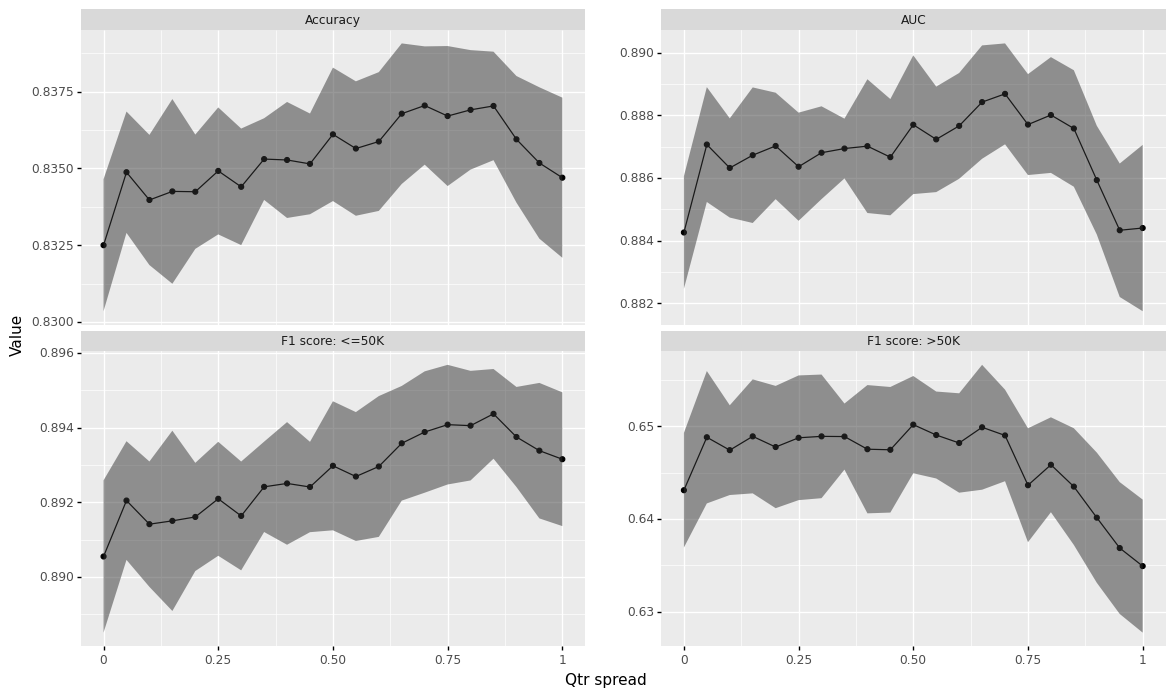

In [67]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [68]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.832502,0.884258,0.766826,0.890549,0.643102,0.002147,0.001800,0.002792,0.002038,0.006174
1,0.05,0.834876,0.887066,0.770427,0.892047,0.648807,0.001974,0.001835,0.003601,0.001589,0.007128
2,0.10,0.833973,0.886319,0.769415,0.891414,0.647416,0.002118,0.001585,0.002687,0.001679,0.004832
3,0.15,0.834252,0.886726,0.770203,0.891503,0.648902,0.003004,0.002166,0.003479,0.002413,0.006138
4,0.20,0.834242,0.887022,0.769679,0.891608,0.647751,0.001860,0.001700,0.003390,0.001448,0.006584
5,0.25,0.834919,0.886358,0.770421,0.892094,0.648748,0.002065,0.001727,0.003588,0.001526,0.006714
6,0.30,0.834401,0.886805,0.770268,0.891635,0.648902,0.001896,0.001483,0.003452,0.001457,0.006657
7,0.35,0.835304,0.886939,0.770647,0.892414,0.648880,0.001329,0.000955,0.001670,0.001209,0.003556
8,0.40,0.835275,0.887016,0.770011,0.892505,0.647518,0.001887,0.002136,0.003341,0.001642,0.006906
9,0.45,0.835147,0.886663,0.769933,0.892409,0.647456,0.001639,0.001857,0.003469,0.001209,0.006762


  0%|          | 0/300 [00:00<?, ?it/s]

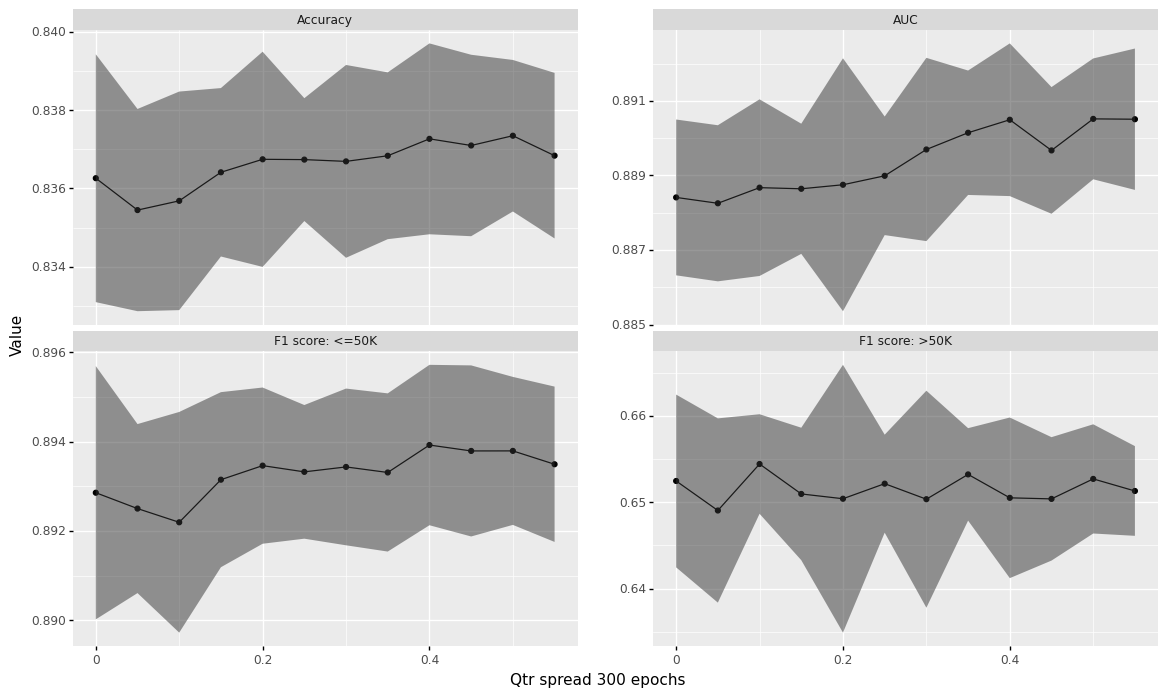

In [99]:
result_qtr_spread_300_epochs = plot_hp_tuning("qtr_spread_300_epochs")

In [100]:
result_qtr_spread_300_epochs 

,Qtr spread 300 epochs,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.836263,0.888410,0.772658,0.892855,0.652461,0.003169,0.002091,0.004849,0.002835,0.009998
1,0.05,0.835448,0.888253,0.770772,0.892500,0.649043,0.002586,0.002095,0.005481,0.001892,0.010662
2,0.10,0.835684,0.888673,0.773309,0.892193,0.654425,0.002795,0.002370,0.002892,0.002470,0.005760
3,0.15,0.836414,0.888642,0.772053,0.893147,0.650960,0.002154,0.001747,0.003613,0.001959,0.007665
4,0.20,0.836746,0.888750,0.771934,0.893461,0.650406,0.002751,0.003393,0.007926,0.001748,0.015496
5,0.25,0.836738,0.888990,0.772735,0.893322,0.652149,0.001571,0.001591,0.002575,0.001496,0.005672
6,0.30,0.836693,0.889697,0.771892,0.893432,0.650351,0.002465,0.002459,0.006373,0.001754,0.012556
7,0.35,0.836837,0.890146,0.773265,0.893308,0.653222,0.002133,0.001669,0.002801,0.001771,0.005351
8,0.40,0.837270,0.890495,0.772216,0.893922,0.650510,0.002441,0.002049,0.004841,0.001795,0.009293
9,0.45,0.837100,0.889672,0.772090,0.893790,0.650389,0.002320,0.001700,0.003611,0.001915,0.007141


  0%|          | 0/840 [00:00<?, ?it/s]

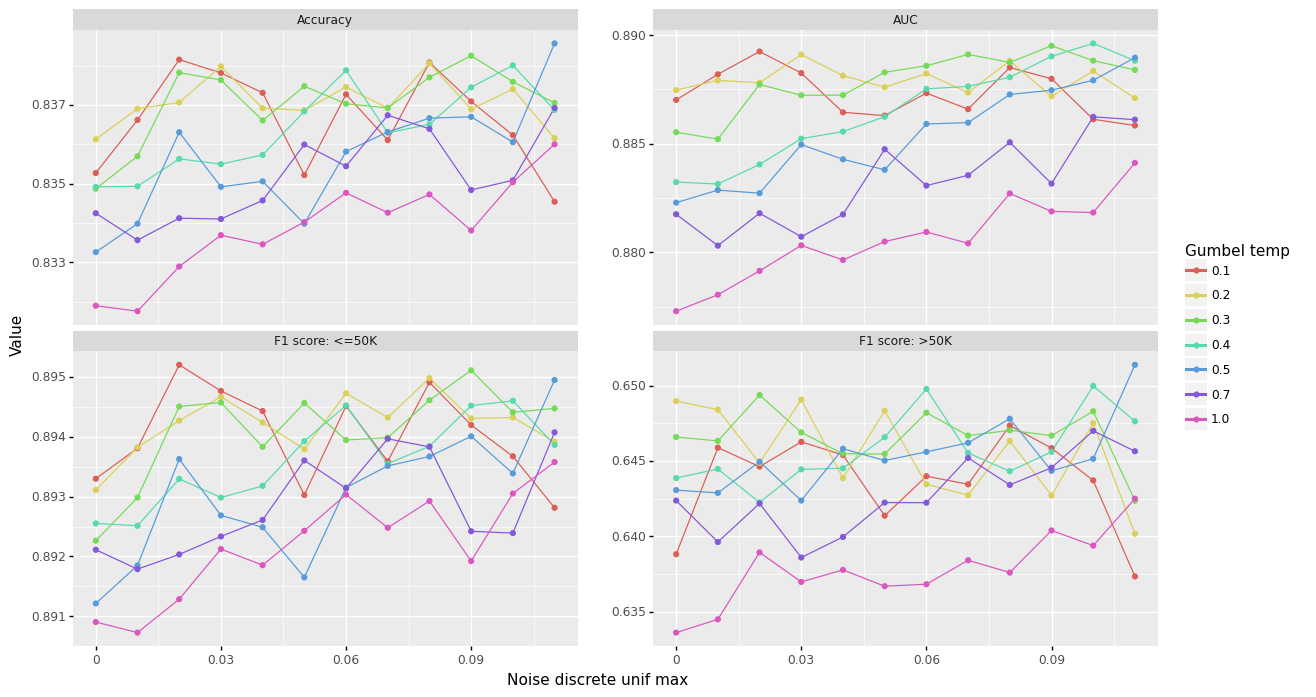

In [72]:
result_oh_encoding_choices = plot_hp_tuning("oh_encoding_choices")

In [73]:
result_oh_encoding_choices

,Noise discrete unif max,Gumbel temp,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.1,0.835272,0.887017,0.766056,0.893300,0.638812,0.002350,0.001989,0.002297,0.001831,0.003564
1,0.00,0.2,0.836129,0.887465,0.771046,0.893112,0.648980,0.002015,0.001778,0.002569,0.001462,0.004147
2,0.00,0.3,0.834874,0.885529,0.769427,0.892263,0.646590,0.002450,0.002103,0.003393,0.001745,0.005653
3,0.00,0.4,0.834920,0.883232,0.768209,0.892553,0.643866,0.002435,0.001543,0.003451,0.001739,0.005842
4,0.00,0.5,0.833260,0.882287,0.767139,0.891213,0.643066,0.001606,0.002765,0.002762,0.001303,0.005442
...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.11,0.3,0.837052,0.888397,0.768421,0.894476,0.642366,0.001636,0.001631,0.003833,0.001158,0.007489
80,0.11,0.4,0.836873,0.888822,0.770752,0.893865,0.647638,0.001704,0.000867,0.002257,0.001282,0.003906
81,0.11,0.5,0.838566,0.888962,0.773169,0.894951,0.651386,0.002314,0.001619,0.002909,0.001850,0.005329
82,0.11,0.7,0.836926,0.886108,0.769861,0.894075,0.645647,0.002297,0.002294,0.003675,0.001864,0.007184


  0%|          | 0/75 [00:00<?, ?it/s]

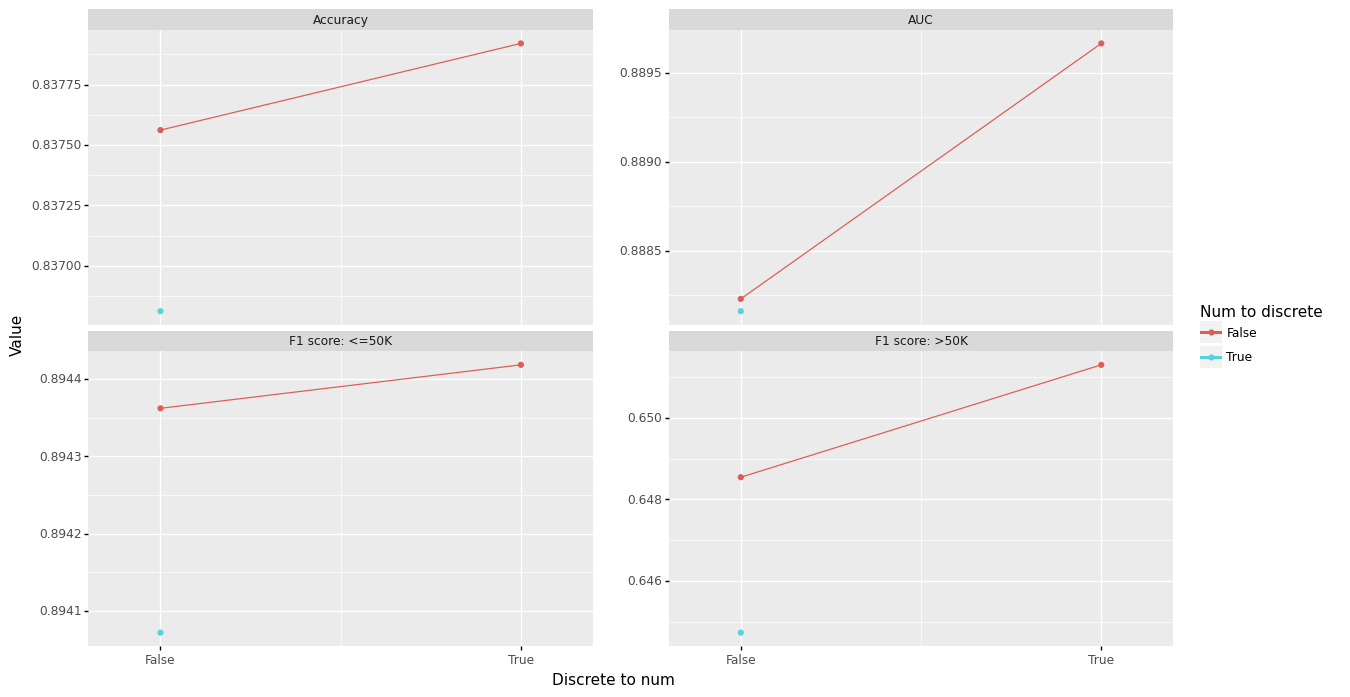

In [89]:
result_add_connection = plot_hp_tuning("add_connection")

In [90]:
result_add_connection

,Discrete to num,Num to discrete,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.837562,0.888229,0.771453,0.894362,0.648543,0.002197,0.001935,0.003675,0.001549,0.006616
1,False,True,0.836813,0.888160,0.769403,0.894072,0.644735,0.001946,0.001882,0.003163,0.001416,0.005770
2,True,False,0.837920,0.889667,0.772858,0.894418,0.651298,0.001543,0.001490,0.002623,0.001124,0.004844


  0%|          | 0/170 [00:00<?, ?it/s]

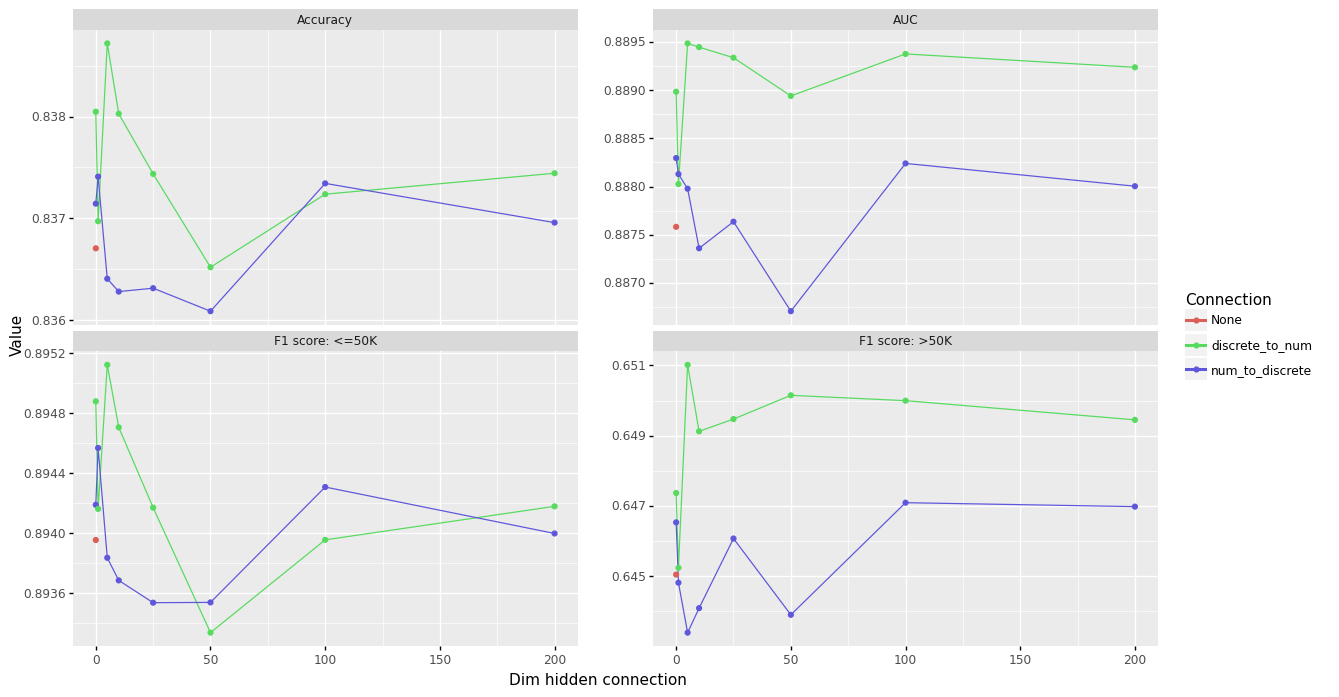

In [76]:
result_add_connection_advanced = plot_hp_tuning("add_connection_advanced")

In [77]:
result_add_connection_advanced

,Dim hidden connection,Connection,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,None,0.836707,0.887581,0.769502,0.893955,0.645048,0.002352,0.001816,0.003809,0.001620,0.006686
1,0,discrete_to_num,0.838048,0.888984,0.771125,0.894880,0.647370,0.002023,0.001398,0.002689,0.001521,0.004685
2,0,num_to_discrete,0.837145,0.888295,0.770362,0.894190,0.646534,0.001966,0.001957,0.004077,0.001271,0.007561
3,1,discrete_to_num,0.836972,0.888025,0.769702,0.894162,0.645241,0.002010,0.001644,0.003347,0.001404,0.005995
4,1,num_to_discrete,0.837410,0.888129,0.769693,0.894569,0.644817,0.002139,0.001709,0.004398,0.001261,0.007911
5,5,discrete_to_num,0.838718,0.889486,0.773070,0.895123,0.651018,0.001812,0.001310,0.001825,0.001367,0.002588
6,5,num_to_discrete,0.836408,0.887977,0.768616,0.893836,0.643396,0.002888,0.001960,0.005457,0.002027,0.010189
7,10,discrete_to_num,0.838028,0.889447,0.771916,0.894706,0.649126,0.001266,0.001760,0.002279,0.000989,0.004433
8,10,num_to_discrete,0.836282,0.887359,0.768889,0.893685,0.644092,0.002599,0.001665,0.003592,0.001791,0.005785
9,25,discrete_to_num,0.837437,0.889337,0.771822,0.894171,0.649474,0.001747,0.001132,0.002344,0.001466,0.004616


  0%|          | 0/200 [00:00<?, ?it/s]

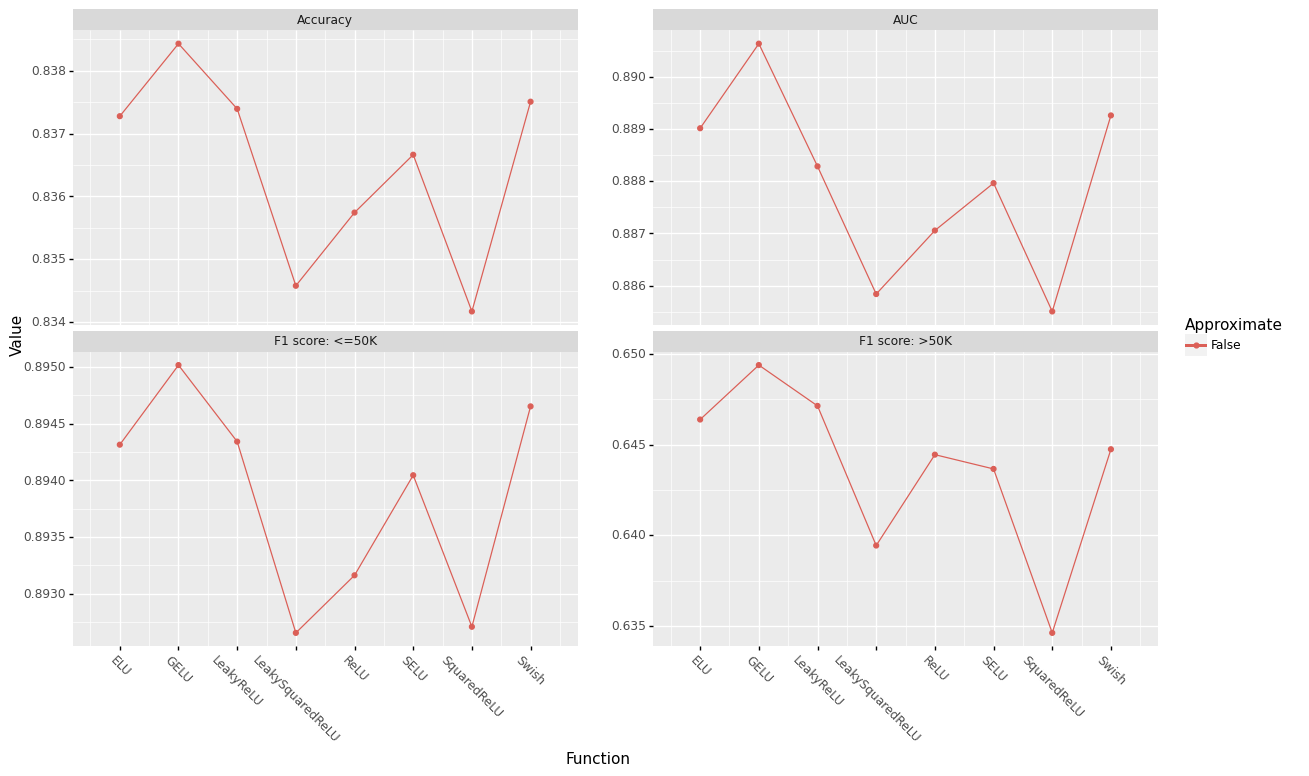

In [93]:
result_activation_function = plot_hp_tuning("activation_function", x_tick_angle=-45)

In [95]:
result_activation_function

,Function,Approximate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,ELU,False,0.837278,0.889017,0.770349,0.894315,0.646383,0.001966,0.001901,0.003778,0.001337,0.006992
1,GELU,False,0.838433,0.890638,0.772201,0.895018,0.649384,0.001447,0.001586,0.003354,0.001146,0.006766
2,LeakyReLU,False,0.837394,0.888286,0.770739,0.894343,0.647134,0.001815,0.002069,0.003965,0.001290,0.007663
3,LeakySquaredReLU,False,0.834576,0.885838,0.766046,0.892655,0.639437,0.002036,0.001714,0.002658,0.001680,0.005132
4,ReLU,False,0.835742,0.887056,0.768805,0.893163,0.644446,0.002526,0.002195,0.005855,0.002049,0.011828
5,SELU,False,0.836664,0.887964,0.768853,0.894046,0.643659,0.002392,0.001881,0.003793,0.001572,0.006387
6,SquaredReLU,False,0.834167,0.885504,0.763665,0.892709,0.634622,0.002485,0.002388,0.007254,0.001476,0.014134
7,Swish,False,0.837509,0.889263,0.769699,0.894654,0.644745,0.001803,0.002154,0.004096,0.001164,0.007764
